In [32]:
file_path ="gplus/" 
edge_files = list.files(path=file_path,pattern="edges") 
circles_files = list.files(path=file_path,pattern="circles")
fts_files = list.files(path=file_path,pattern="feat")
initial_graph = list()
final_graph = list()
graph_circles = list()
ego_nodes = list()

In [42]:
cnt = 0
node_names = c()
for(i in 1:length(edge_files)){
    # get node id
    node = strsplit(edge_files[i],".edges")[[1]]
    node_names <-c(node_names,node)
    #print(node)
    ego_nodes[i] = node
    fc = file(paste(file_path,node,".circles",sep=""),open="r") 
    if(length(fc)>0){
        file_lines <- readLines(fc)
        if(length(file_lines)>0){
            circles =list()
            for(j in 1:length(file_lines)){
                circle_users = strsplit(file_lines[j],"\t")
                circles[[j]] <- circle_users[[1]][-1]
              }
            # find users who have more than 2 circles
            if(length(circles)>2){
                cnt = cnt + 1
                initial_graph[[i]] <- read.graph(paste(file_path,edge_files[i],sep=""),format="ncol",directed=TRUE)
                graph_circles[[i]] <- circles
                graph_nodes <- V(initial_graph[[i]])
                print(length(graph_nodes))
                print(node)
                # add the core node to his neighbor list and construct the graph
                final_graph[[i]] <- add.vertices(initial_graph[[i]],1,name=node)
                core_index = which(V(final_graph[[i]])$name==node) 
                core_node_edges = list()
                ### add edges connecting to this core node
                for(k in 1:length(graph_nodes)){
                    core_node_edges = c(core_node_edges, c(core_index, k))
                }
                final_graph[[i]] <- add.edges(final_graph[[i]],core_node_edges)
            } 
        }
    }
    close(fc)
}

[1] 1187
[1] "100535338638690515335"
[1] 559
[1] "100962871525684315897"
[1] 2614
[1] "101130571432010257170"
[1] 1052
[1] "101185748996927059931"
[1] 2455
[1] "101263615503715477581"
[1] 3814
[1] "101373961279443806744"
[1] 488
[1] "101541879642294398860"
[1] 4712
[1] "101626577406833098387"
[1] 2224
[1] "102170431816592344972"
[1] 102
[1] "102615863344410467759"
[1] 1371
[1] "102778563580121606331"
[1] 2332
[1] "103236949470535942612"
[1] 2009
[1] "103892332449873403244"
[1] 452
[1] "104105354262797387583"
[1] 3091
[1] "104607825525972194062"
[1] 475
[1] "104672614700283598130"
[1] 1730
[1] "104987932455782713675"
[1] 4289
[1] "106186407539128840569"
[1] 4842
[1] "106228758905254036967"
[1] 4903
[1] "106382433884876652170"
[1] 1083
[1] "106837574755355833243"
[1] 4369
[1] "107040353898400532534"
[1] 2156
[1] "107203023379915799071"
[1] 2512
[1] "107223200089245371832"
[1] 562
[1] "107459220492917008623"
[1] 4362
[1] "107489144252174167638"
[1] 1743
[1] "108883879052307976051"
[1] 773

In [43]:
#q18
cat("there are ", length(edge_files),"nodes and there are ",cnt,"personal networks" )

there are  132 nodes and there are  57 personal networks

[1] 69


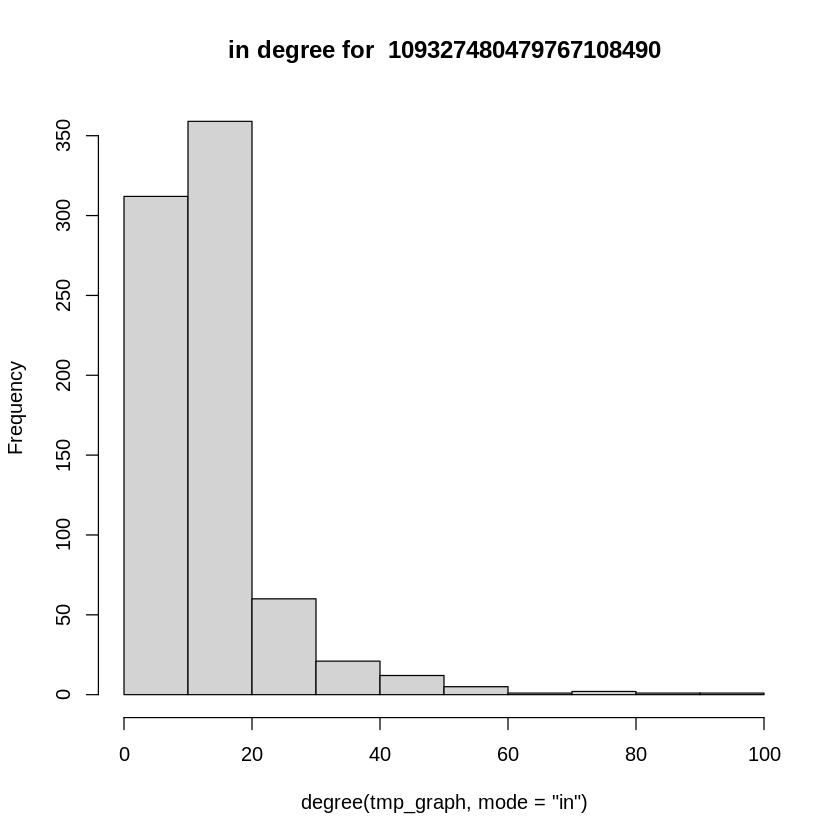

[1] 115


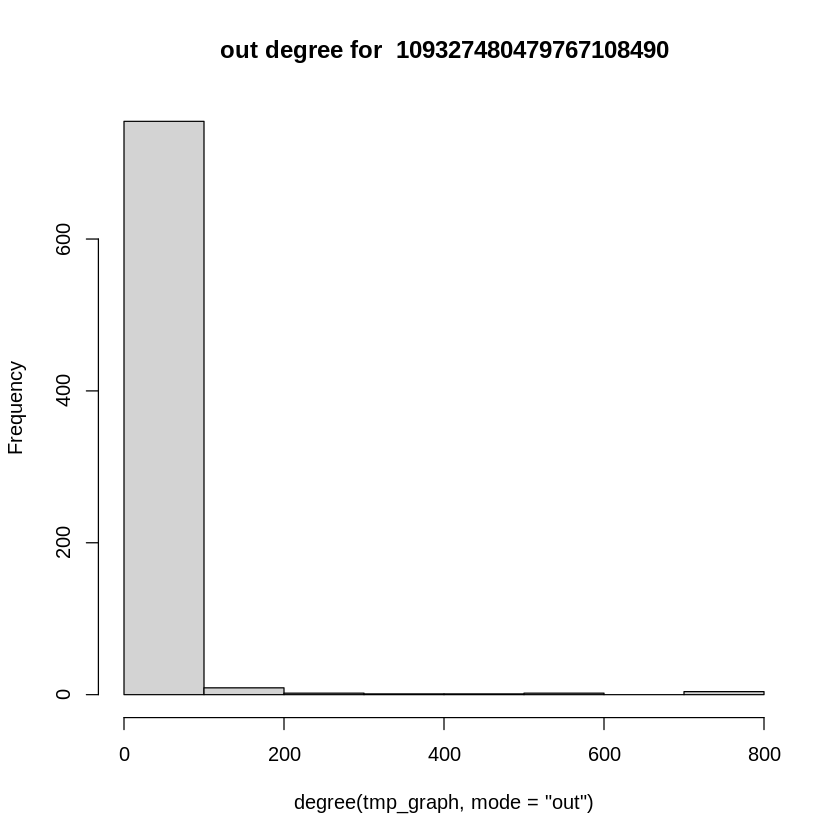

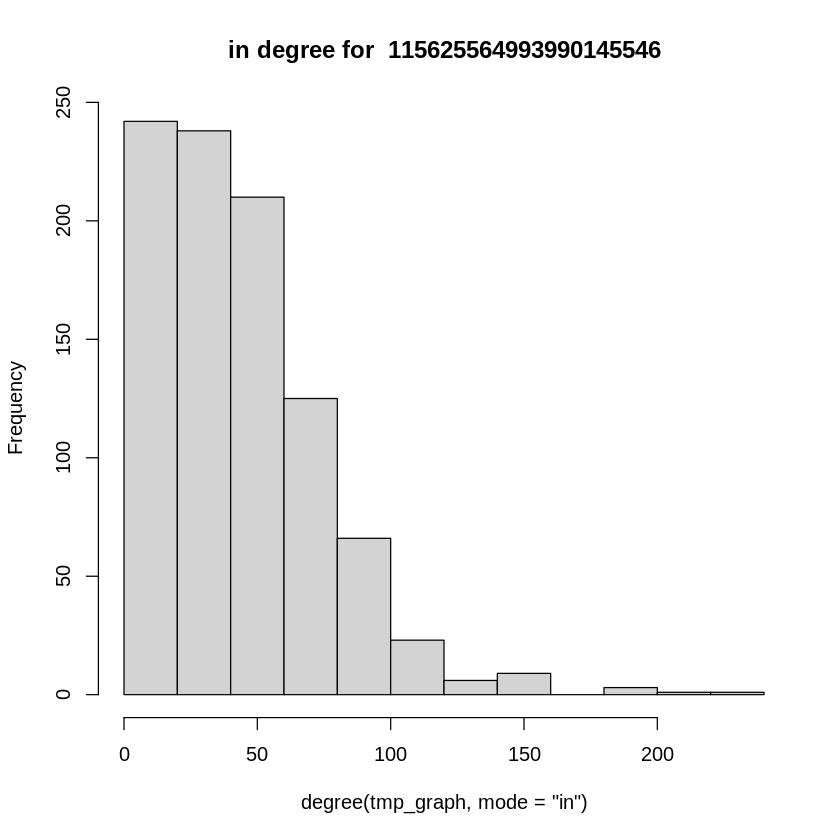

[1] 17


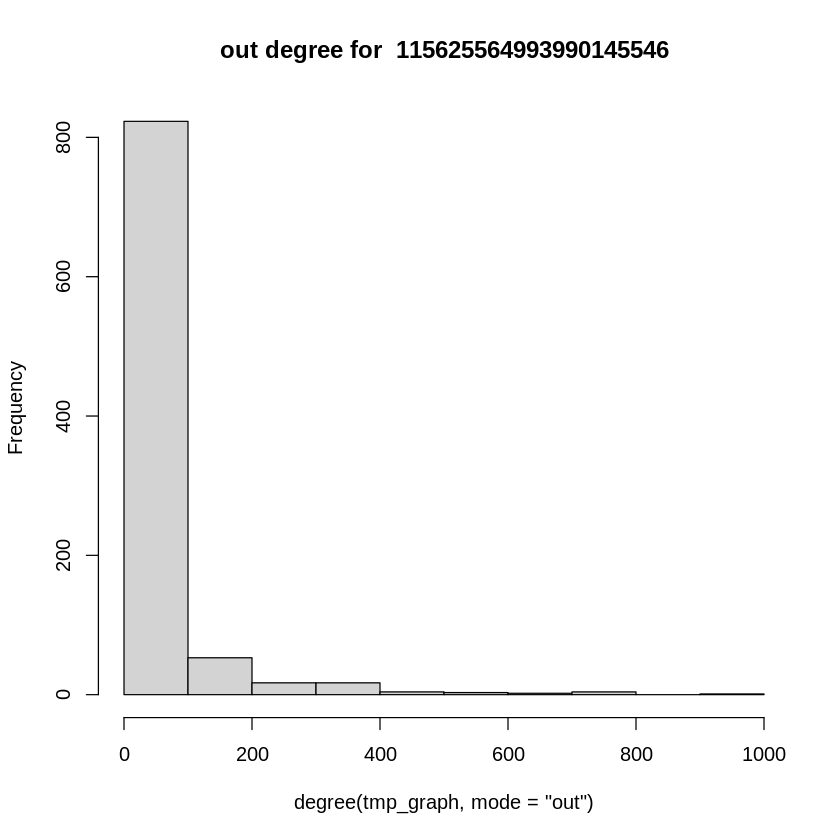

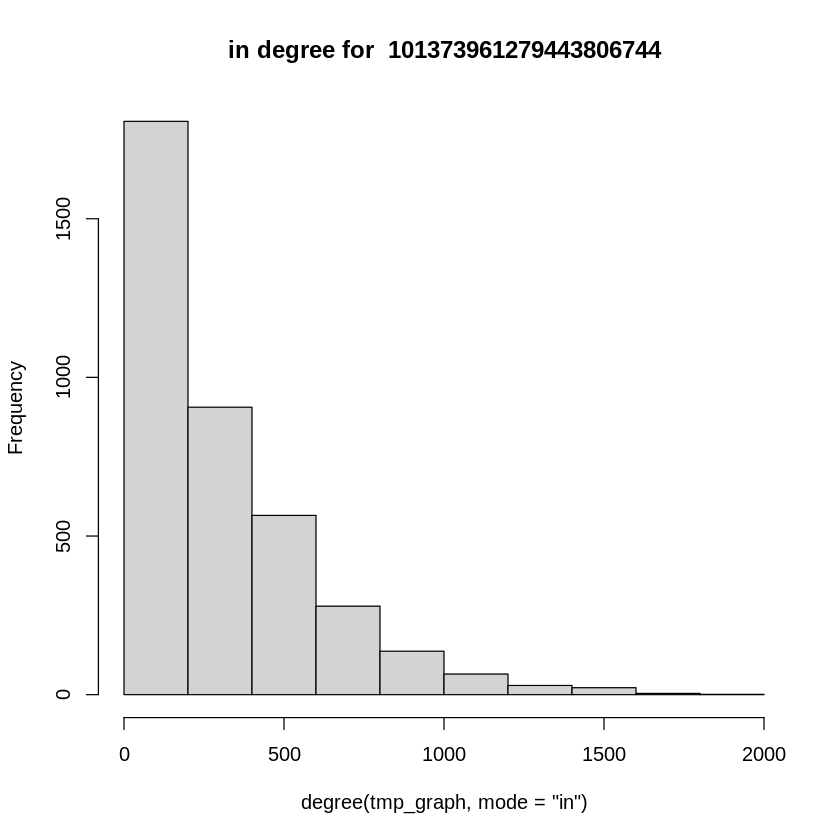

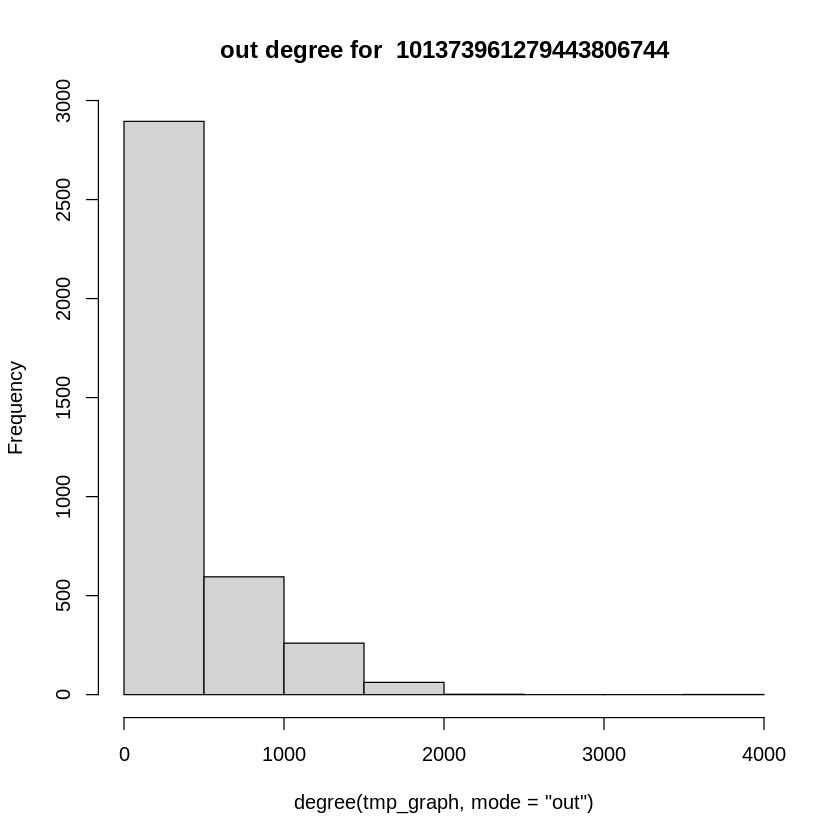

In [45]:
#q19 
interest_node = c('109327480479767108490', '115625564993990145546','101373961279443806744')
graph_inds = c()
for (i in 1: length(interest_node)){
    graph_ind <- which(node_names==interest_node[i])
    graph_inds <- c(graph_inds, graph_ind)
    print(graph_ind)
    tmp_graph = final_graph[[graph_ind]]
    hist(degree(tmp_graph, mode="in"),main = paste("in degree for ", interest_node[i]))
    hist(degree(tmp_graph, mode="out"),main = paste("out degree for ", interest_node[i]))
}


In [ ]:
#q20 
#https://igraph.org/r/doc/cluster_walktrap.html


In [ ]:
# libraries are allowed. try to do without libraries?  